# In the following section, we will go through the following steps:

    Reading in the dataset
    Dividing the dataset into a separate training and test dataset
    Standardization of the features
    Principal Component Analysis (PCA) to reduce the dimensionality
    Training a naive Bayes classifier
    Evaluating the classification accuracy with and without standardization


In [1]:
import pandas as pd 
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
    header=None,
    usecols=[0,1,2]
)

# Dividing the dataset into a separate training and test dataset

In [14]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:, 1:]
y_wine = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.30, random_state=12345)


# Feature Scaling - Standardization

In [15]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)



# Dimensionality reduction via Principal Component Analysis (PCA)

In [19]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)


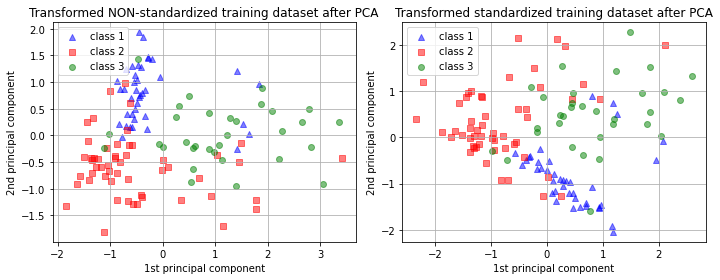

In [35]:
from matplotlib import pyplot as plt 

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,4))

for l, c, m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
               color=c,
               label='class %s'%l,
               alpha=0.5,
                marker=m
               )


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper left')
    ax.grid()
plt.tight_layout()

plt.show() 

In [40]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

In [41]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
79.84%

Prediction accuracy for the test dataset
77.78%



In [42]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
75.81%

Prediction accuracy for the test dataset
81.48%

